# Artist Identification using Convolutional Neural Networks

# Prerequisites

    Anaconda Prompt
conda install pytorch -c pytorch

conda install torchvision -c pytorch

conda install keras

In [1]:

import os
import matplotlib.pyplot as plt
from PIL import Image #, ImageOps
import numpy as np
import random

# import keras
# from keras.applications import resnet50


# Curatare date

In [16]:

# Redenumire imagini fisier (aveau caractere dubioase)

# https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory

# path = 'C:\\Users\\chitu\\Documents\\Facultate\\IAAV\\Proiect\\best-artworks-of-all-time\\images\\Albrecht_Durer'
# images = os.listdir(path)


# for idx,img in enumerate(images):
#     img_path = path + "\\" + img
#     new_img_name = path + "Albrecht_Durer_" + str(idx) + ".jpg"
#     os.rename(img_path, new_img_name)


# Extragere informatii date

DataObjects:
- artists = lista pictori
- nr_paintings = nr pictori per artist
- artist_frequency = pair(artist, nr picturi)
- images = pair(PIL Image, label pictor)

In [17]:
path = 'C:\\Users\\chitu\\Documents\\Facultate\\IAAV\\Proiect\\best-artworks-of-all-time\\images'


In [18]:
artists = os.listdir(path)


nr_paintings = []
for artist_folder in os.listdir(path):
    nr_paintings.append( len( [painting for painting in  os.listdir(path + "\\" + artist_folder)] ) )
    
    
artist_frequency = (artists, nr_paintings)

In [19]:
min_w = 2048
max_w = 0
min_h = 2048
max_h = 0

for artist_folder in os.listdir(path):
    for painting in os.listdir(path + "\\" + artist_folder):
        picture_path = "images\\" + artist_folder + "\\" + painting 
        im = Image.open(picture_path)
        h, w = im.size
        min_h = min(h, min_h)
        max_h = max(h, max_h)
        min_w = min(w, min_w)
        max_w = max(w, max_w)

print(min_h, max_h)
print(min_w, max_w)


204 4096
226 3826


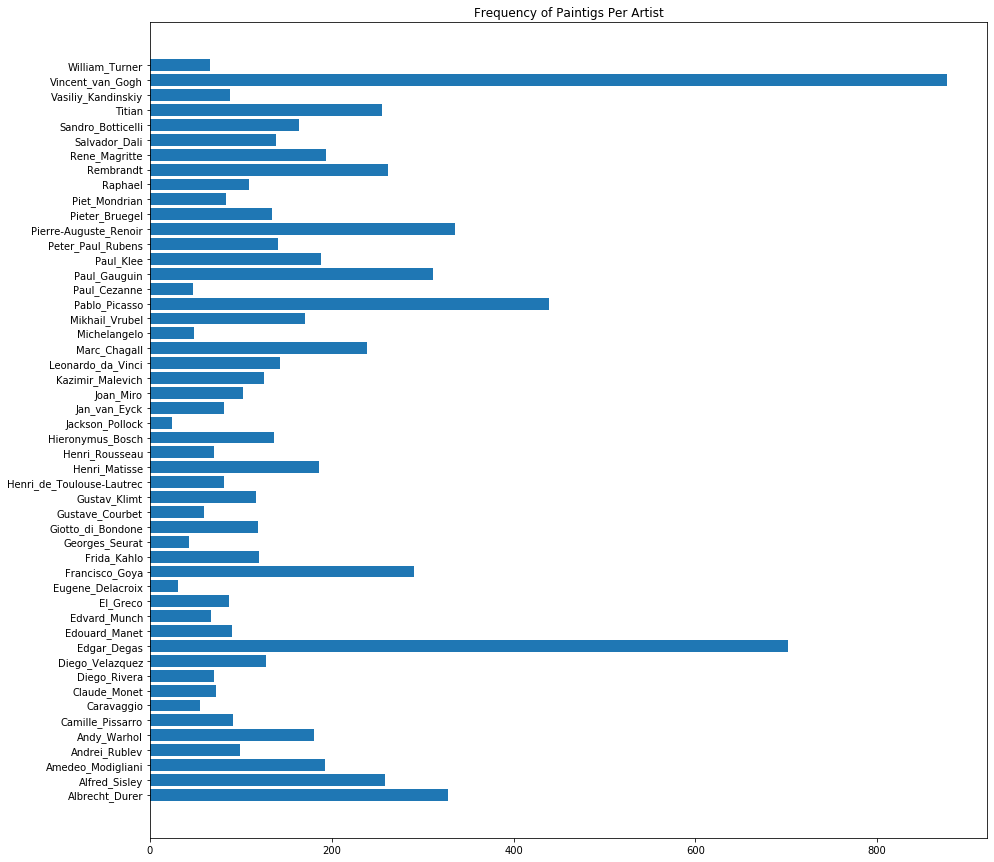

In [20]:
x_pos = range(len(artist_frequency[1]))

plt.figure(figsize=(15,15))
plt.barh(x_pos, artist_frequency[1])
plt.title("Frequency of Paintigs Per Artist")

plt.yticks(x_pos, artist_frequency[0])

plt.show()

Observam ca nu sunt distribuite tocmai egal datele, motiv pentru care vom alege maxim 100 de picturi de la fiecare artist

De asemenea selectam doar pozele care au dimensiunea minim 256x256 pentru ca ulterior sa le putem cropa mai usor

In [21]:
images = []

for idx,artist_folder in enumerate(os.listdir(path)):
    k = 0
    for painting in os.listdir(path + "\\" + artist_folder):
        if k < 100:
            picture_path = "images\\" + artist_folder + "\\" + painting 
            im = Image.open(picture_path)
            h, w = im.size

            if w < 256 or h < 256:
                continue
            else:
                k += 1            
                images.append((im,idx)) # label ish, tho se poate extrage si din im.filename
        else:
            break
        # Print each image
#         img = np.asarray(im)
#         plt.figure(figsize=(2,2))
#         plt.imshow(img)
#         plt.show()


In [36]:
print(len(images))

4353


In [22]:
# Actualizam artist_frequency

for (idx,_) in enumerate(artist_frequency[1]):
    if artist_frequency[1][idx] > 100:
        artist_frequency[1][idx] = 100

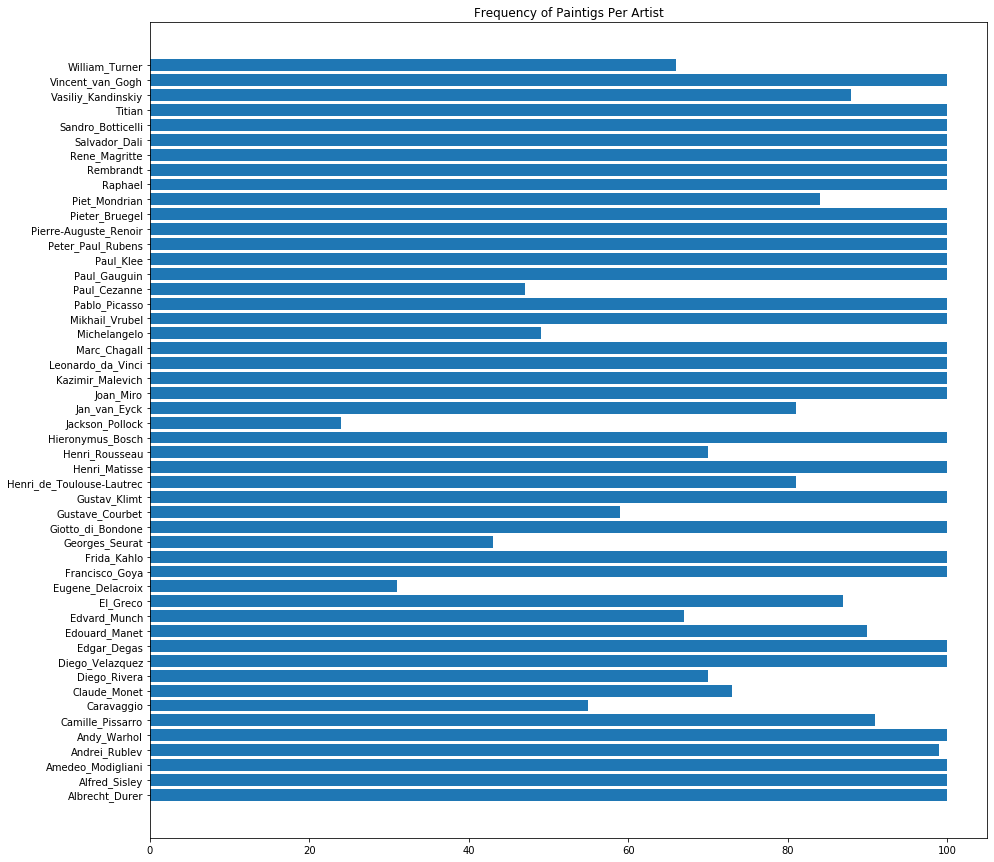

In [23]:
x_pos = range(len(artist_frequency[1]))

plt.figure(figsize=(15,15))
plt.barh(x_pos, artist_frequency[1])
plt.title("Frequency of Paintigs Per Artist")

plt.yticks(x_pos, artist_frequency[0])

plt.show()

# Vizualizare Picturi

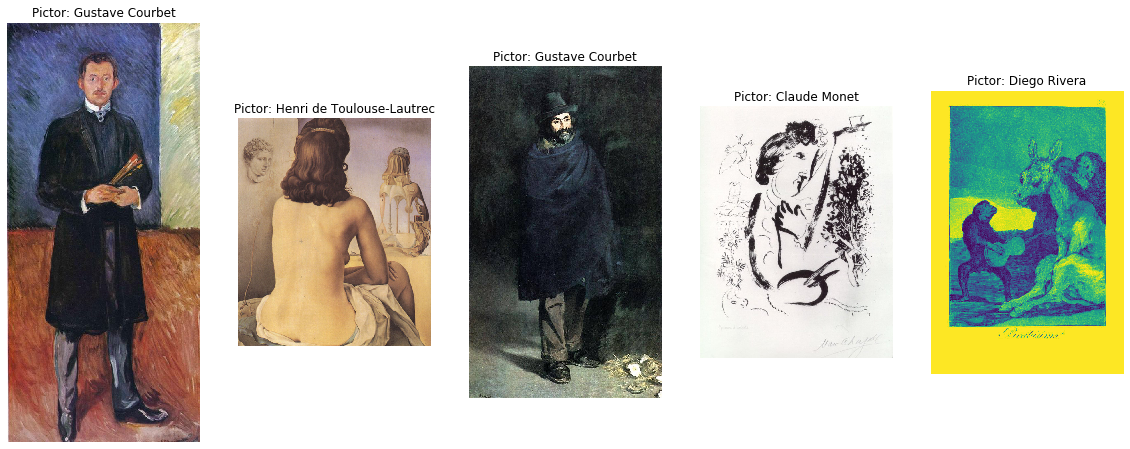

In [24]:
# Print few random paintings
n = 5
fig, axes = plt.subplots(1, n, figsize=(20,10))

for i in range(n):
    random_artist = random.choice(artists)
    random_image = random.choice(images)
    image = np.asarray(random_image[0])
    axes[i].imshow(image)
    axes[i].set_title("Pictor: " + random_artist.replace('_', ' '))
    axes[i].axis('off') # hide x, y axis

plt.show()

In [3]:

def get_label(image): # image in format PIL Image
    return image.filename.split('\\')[1].replace("_", " ")


In [26]:
# Load the ResNet50 model (pre-trained)
# resnet_model = resnet50.ResNet50(weights='imagenet')


# DataLoader

In [32]:
# from IPython import display as dspl

# import time

# import torch.optim as optim
# import torch.nn as nn
import torch.utils.data as data
from torchvision.transforms.functional import to_tensor
import torch
import torchvision

In [49]:


# def preproc_fn(images):
#     """
#         Functia primeste un batch de exemple pe care trebuie sa le transforme in tensori
#            si sa le puna intr-un batch de tip torch.Tensor.
#     """
#     processed_images = []
#     processed_labels = []

#     for img in images: # example este un tuplu returnat de obiectul de tip Dataset
#         tensor_image = to_tensor(img[0]) # Transformati in obiect de tip torch.Tensor imaginea din example
#         tensor_image = tensor_image.unsqueeze(0) # Adaugati inca o dimensiune la inceputul imaginii
#         processed_images.append(tensor_image)

#         label = np.array([img[1]]) # Creati un obiect de tip np.ndarray din labelul exemplului
#         tensor_label = torch.tensor(label) # Creati un tip de tip torch.Tensor din label
#         tensor_label = tensor_label.unsqueeze(0) # Adaugati inca o dimensiune la incepului labelului
#         processed_labels.append(tensor_label)

#     torch_images = torch.cat(processed_images, dim=0) # Concatenati imaginile pe prima dimensiune pentru a forma un batch de imagini
#     torch_labels = torch.cat(processed_labels, dim=0) # Concatenati labelurile pe prima dimensiune pentru a forma un batch de labeluri

#     return torch_images, torch_labels

# print(preproc_fn(images))

# # loader trebuia sa primeasca doar imaginile de train, deci trebuia sa fi dat deja split la imagini in train si test
# loader = data.DataLoader(images, batch_size=1000, shuffle=True, collate_fn=preproc_fn)
# print("Datasetul contine {} de batch-uri".format(len(loader)))

# # Cerintele 2 si 3 - Iterati prin loader1 si printati doar primul element si shape-ul celor 2 tensori din exemplu
# for idx, example in enumerate(loader):
# #     if idx == 0:
# #         # print(example)
#     print(example[idx].size())
#     print(example[idx].size())


RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 8773848 bytes. Buy new RAM!


# Data Augmentation

significantly increase the diversity of data available for training models, without actually collecting new data. 



Cropand central sansele sa aiba border negru sunt semnificativ mai mici, motiv pt care vom roti doar imaginile cropate central
Cele cropate random vor fi cel mult flipped sau mirrored

In [6]:
def random_crop(x, crop_size=(224,224)):
    h, w, _ = x.shape
    range_w = (w - crop_size[1])
    range_h = (h - crop_size[0])
    offset_w = 0 if range_w == 0 else np.random.randint(range_w)
    offset_h = 0 if range_h == 0 else np.random.randint(range_h)
    cropped_x = x[offset_h:offset_h + crop_size[0], offset_w:offset_w + crop_size[1], :]
    return cropped_x

In [7]:
def center_crop(x, crop_size=(224,224)):
    h, w, _ = x.shape
    center_h = h // 2
    center_w = w // 2
    offset_w = center_h - (crop_size[0] // 2)
    offset_h = center_h - (crop_size[0] // 2)
    cropped_x = x[offset_h:offset_h + crop_size[0], offset_w:offset_w + crop_size[1], :]
    return cropped_x

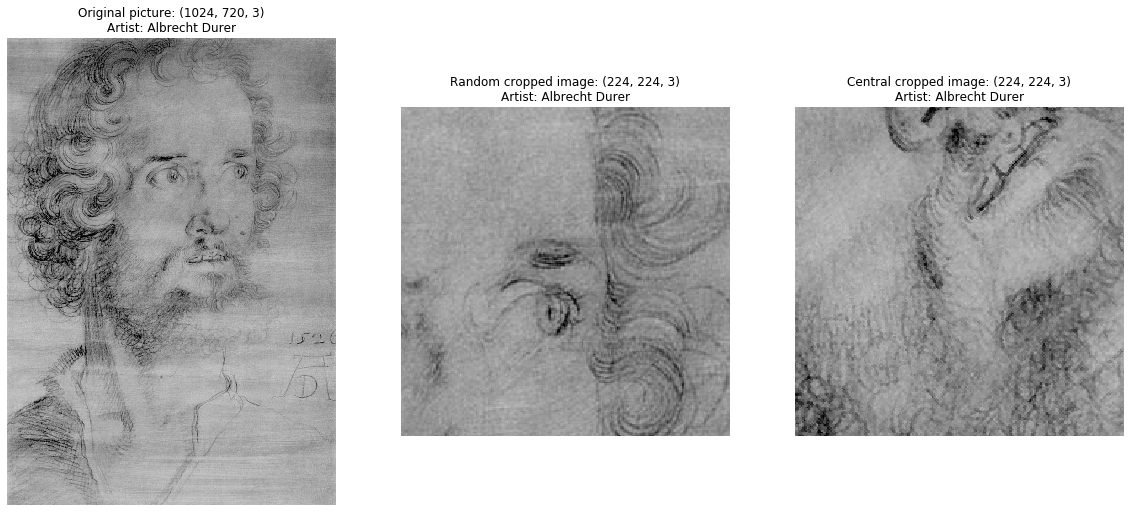

In [18]:
image = Image.open("images\\Albrecht_Durer\\Albrecht_Durer_0.jpg")
# image = ImageOps.flip(im)
# image = ImageOps.mirror(im)

fig, axes = plt.subplots(1, 3, figsize=(20,10))

img = np.asarray(image)
axes[0].imshow(image)
axes[0].set_title("Original picture: " + str(img.shape) + "\nArtist: " + get_label(image))
axes[0].axis('off')

cropped = random_crop(img)
axes[1].imshow(cropped)
axes[1].set_title("Random cropped image: " + str(cropped.shape) + "\nArtist: " + get_label(image))
axes[1].axis('off')

image_rotated = image.rotate(45, expand = True)
img_rotated = np.asarray(image_rotated)
c_cropped = center_crop(img_rotated)
axes[2].imshow(c_cropped)
axes[2].set_title("Central cropped image: " + str(c_cropped.shape) + "\nArtist: " + get_label(image))
axes[2].axis('off')


plt.show()

# Pre-procesarea datelor

# Features

Line Features, 
TextonHistograms, 
ColorHistograms, 
Geometric Probability Map, 
brush strokes
Geometric Specific Histograms

make CNN learn features on its own

try to learn different features at different layers

# pre-process:
    - zero-centerd the images
    - normalize them
    - resize to 224x224 by cropping either random crop or center crop

# training:
    - randomly rotate pictures during training (to reduce overfitting)
    - do not flip due to sensitivity of data

# ResNet 50 / 152
https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33

# Freeeze layers to avoid overfitting (cred in ResNet)
- Freezing a layer, too, is a technique to accelerate neural network training by progressively freezing hidden layers

https://analyticsindiamag.com/what-does-freezing-a-layer-mean-and-how-does-it-help-in-fine-tuning-neural-networks/
    
    
Here is a sample code snippet showing how freezing is done with Keras:
from keras.layers import Dense, Dropout, Activation, Flatten

# Output: 
pictorul prezis si un procentaj eventual

# Game: Ghiceste pictorul
- primesti o poza si variante de raspuns multimplu (Eventual primele 5 guess uri ale ML-ului)
- ai idk 10 s sa alegi o varianta de raspuns
- si se coloreaza ca la conquiztador (daca si tu si botul ati raspuns la fel)
- eventual dupa ce ghicesti ai jos niste caracteristici dominante ale pictorului
    + poza cu portretul pictorului

Joc de cultura "generala"

# Plotari - de verificat ce alte ploturi faine pt poze si date mai exista